In [2]:
import pandas, numpy
from novelty_experiment_runner_cartpole import NoveltyExperimentRunnerCartpole
from os import path
import settings
import constants
import seaborn as sns
import matplotlib.pyplot as plt

importing local settings
import error!!!!


Novelty: {gravity: 12}

In [17]:
results_file_2 = open(path.join(settings.ROOT_PATH, "data", "cartpole", "test", "planner_experiment_test.csv"), "r")
dataframe2 = NoveltyExperimentRunnerCartpole.categorize_examples_for_novelty_detection(pandas.read_csv(results_file_2))


In [18]:
dataframe2

,Unnamed: 0,trial_num,episode_num,type,novelty_probability,novelty_threshold,novelty,novelty_characterization,performance,novelty_id,level,env_config,is_novel,TN,FP,TP,FN
0,0,0,0,non-novelty-performance,0.816753,0.999999,0,nothing,1.00,0.0,2.0,{'gravity': 12},False,1,0,0,0
1,0,0,1,non-novelty-performance,1.000000,0.999999,0,nothing,1.00,0.0,2.0,{'gravity': 12},True,0,1,0,0
2,0,0,2,non-novelty-performance,1.000000,0.999999,0,nothing,1.00,0.0,2.0,{'gravity': 12},True,0,1,0,0
3,0,0,3,non-novelty-performance,1.000000,0.999999,0,nothing,0.93,0.0,2.0,{'gravity': 12},True,0,1,0,0
4,0,0,4,non-novelty-performance,1.000000,0.999999,0,nothing,1.00,0.0,2.0,{'gravity': 12},True,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0,2,10,known-novelty,1.000000,0.999999,0,nothing,1.00,0.0,2.0,{'gravity': 12},True,0,0,1,0
71,0,2,11,known-novelty,1.000000,0.999999,0,nothing,1.00,0.0,2.0,{'gravity': 12},True,0,0,1,0
72,0,2,12,known-novelty,1.000000,0.999999,0,nothing,1.00,0.0,2.0,{'gravity': 12},True,0,0,1,0
73,0,2,13,known-novelty,1.000000,0.999999,0,nothing,1.00,0.0,2.0,{'gravity': 12},True,0,0,1,0


In [19]:
trials,cdt = NoveltyExperimentRunnerCartpole.get_trials_summary(dataframe2)
print(trials)
print(cdt)

                      FN  FP  TN  TP  performance  is_CDT
novelty_id trial_num                                     
0.0        0           0   4   1  20       0.9878   False
           1           0   0   5  20       0.8824    True
           2           0   2   3  20       0.9822   False
                      FN  FP  TN  TP  performance  is_CDT
novelty_id trial_num                                     
0.0        1           0   0   5  20       0.8824    True


In [25]:
M1, M2, M21 = NoveltyExperimentRunnerCartpole.get_program_metrics(cdt, trials)
print("M1: {}".format(M1))
print("M2: {}".format(M2))
print("M21: {}".format(M21))

M1: 0.0
M2: 0.3333333333333333
M21: 0.3333333333333333


In [23]:
def plot_experiment_results(df, novelty_episode_number):
    plt.figure(figsize=(16,9))
    sns.lineplot(data=df, y='performance', x='episode_num', hue='type', ci=95)
    plt.axvline(x=novelty_episode_number, color='red')
    plt.title("Experiment results", fontsize=20)
    plt.xlabel("episodes", fontsize=15)
    plt.ylabel("performance", fontsize=15)

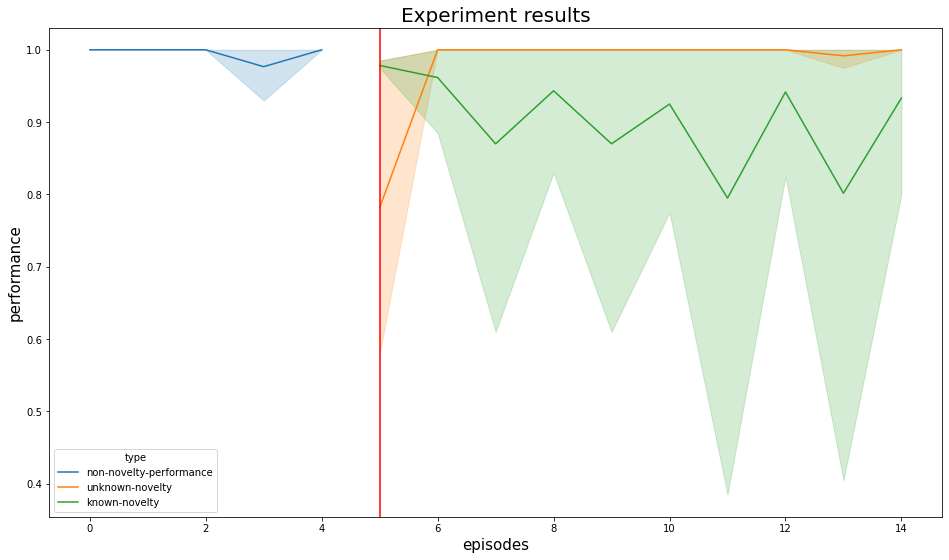

In [24]:
plot_experiment_results(dataframe2, 5)